In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import yfinance as yf
import datetime as dt

In [63]:
from datetime import datetime, timedelta
ticker=input("Input the stock ticker: ")
end = datetime.now()
start = end - timedelta(days=365 * 2)  # Last 2 years

data = yf.download(ticker, start=start, end=end)
data = data[['Close']]
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2023-04-13,163.907013
2023-04-14,163.560547
2023-04-17,163.580338
2023-04-18,164.807953
2023-04-19,165.956375


In [64]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

# Reshape for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)


In [65]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [66]:
# Cell 5: Check if model exists, load or train
import os
from tensorflow.keras.models import load_model

# Generate a unique model filename based on the stock ticker
model_path = f"{ticker}_model.h5"

if os.path.exists(model_path):
    print(f"Loading saved model for {ticker}...")
    model = load_model(model_path)
else:
    print(f"Training new model for {ticker}...")
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(32))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer="adam", loss="mean_squared_error")
    model.summary()

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=2,
        validation_split=0.1
    )

    # Save the trained model
    model.save(model_path)
    print(f"Model saved to {model_path}")

c:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training new model for AAPL...


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - loss: 0.0125 - val_loss: 0.0025
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0079 - val_loss: 0.0069
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0067 - val_loss: 0.0096
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0041 - val_loss: 0.0072
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0043 - val_loss: 0.0024
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0030 - val_loss: 0.0018
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 8/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0039 - val_loss: 0.0082
Epoch 9/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 10/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0036 - val_loss: 0.0014
Epoch 11/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 12/100
159/159 ━━━━━━━━

Model saved to AAPL_model.h5


In [67]:
'''model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
'''

"model = Sequential()\nmodel.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(32))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(1))\n\nmodel.compile(optimizer='adam', loss='mean_squared_error')\nmodel.summary()\n"

In [68]:
'''history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=2,
    validation_split=0.1
)
'''

'history = model.fit(\n    X_train, y_train,\n    epochs=100,\n    batch_size=2,\n    validation_split=0.1\n)\n'

In [69]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step  


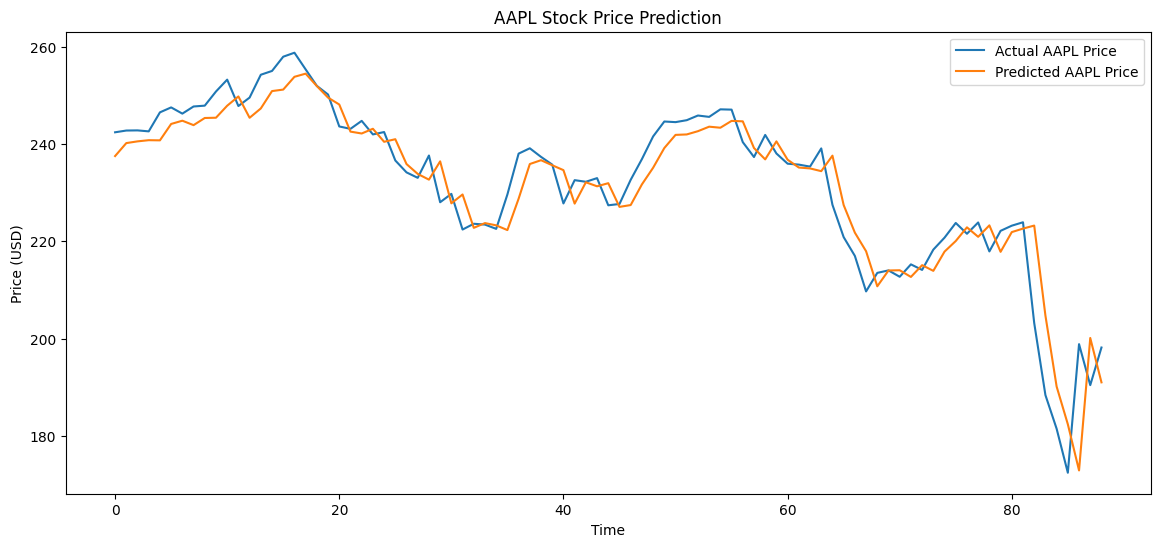

In [70]:
plt.figure(figsize=(14, 6))
plt.plot(actual_prices, label='Actual '+ticker+' Price')
plt.plot(predicted_prices, label='Predicted '+ticker+ ' Price')
plt.title(ticker+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [71]:
future_input = scaled_data[-60:].reshape(1, 60, 1)
future_predictions = []

for _ in range(7):
    pred = model.predict(future_input)[0][0]
    future_predictions.append(pred)
    future_input = np.append(future_input[:,1:,:], [[[pred]]], axis=1)

future_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Show with dates
from datetime import timedelta
last_date = data.index[-1]
future_dates = [last_date + timedelta(days=i+1) for i in range(7)]

future_df = pd.DataFrame({'Date': future_dates, 'Predicted Price (USD)': future_prices.flatten()})
print(future_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
        Date  Predicted Price (USD)
0 2025-04-12             198.122040
1 2025-04-13             197.903885
2 2025-04-14             197.646255
3 2025-04-15             197.430176
4 2025-04-16             197.236298
5 2025-04-17             197.059586
6 2025-04-18             196.896988
